# Install package

In [1]:
! pip install --quiet -U pip && pip install --quiet -e ..

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from tensorflow_taxifare_deep.trainer import Trainer

# Train

In [4]:
%%time
trainer = Trainer(nrows=100_000)

CPU times: user 728 ms, sys: 173 ms, total: 900 ms
Wall time: 4.94 s


In [5]:
%%time
trainer.clean()

###### loading and cleaning....
clean 0.05
CPU times: user 47.4 ms, sys: 4.41 ms, total: 51.8 ms
Wall time: 50.9 ms


In [6]:
%%time
trainer.preproc(test_size=0.3)

###### preprocessing....
###### shape of X_train_preproc, y_train:  (59326, 221) (59326,)
preproc 4.03
CPU times: user 71.5 ms, sys: 133 ms, total: 204 ms
Wall time: 4.03 s


###### fitting...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               44400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 66,541
Trainable params: 66,541
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500


2022-03-07 15:48:06.037886: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-07 15:48:06.187021: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


649/649 [==============================] - 1s 1ms/step - loss: 45.3382 - mae: 2.9117 - val_loss: 37.0200 - val_mae: 2.2439
Epoch 2/500
649/649 [==============================] - 1s 1ms/step - loss: 28.7790 - mae: 2.2744 - val_loss: 33.5349 - val_mae: 2.1566
Epoch 3/500
649/649 [==============================] - 1s 1ms/step - loss: 26.5972 - mae: 2.2405 - val_loss: 32.1784 - val_mae: 2.4253
Epoch 4/500
649/649 [==============================] - 1s 1ms/step - loss: 25.1119 - mae: 2.2227 - val_loss: 29.9201 - val_mae: 2.1697
Epoch 5/500
649/649 [==============================] - 1s 1ms/step - loss: 23.6924 - mae: 2.1692 - val_loss: 28.4498 - val_mae: 2.2736
Epoch 6/500
649/649 [==============================] - 1s 1ms/step - loss: 22.4977 - mae: 2.1579 - val_loss: 27.1546 - val_mae: 2.1581
Epoch 7/500
649/649 [==============================] - 1s 1ms/step - loss: 21.7020 - mae: 2.1350 - val_loss: 26.9015 - val_mae: 2.2752
Epoch 8/500
649/649 [==============================] - 1s 1ms/step 

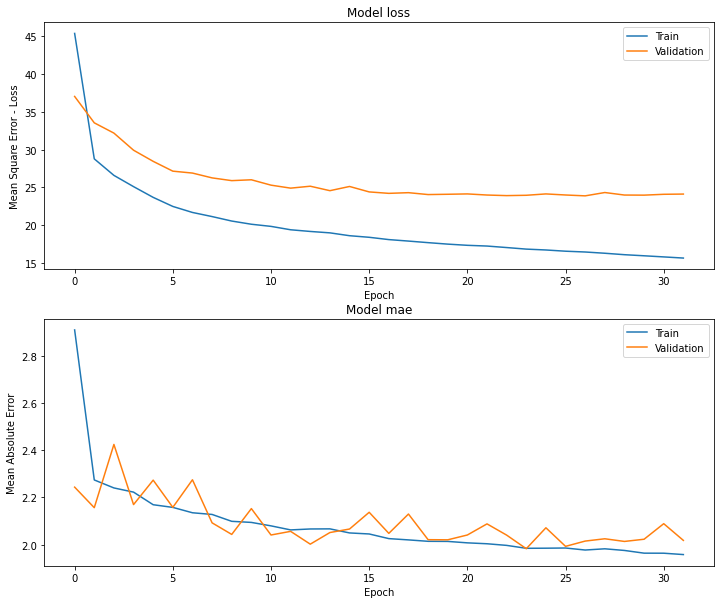

fit 25.53
CPU times: user 45.5 s, sys: 6.64 s, total: 52.1 s
Wall time: 25.5 s


In [7]:
%%time
trainer.fit(plot_history=True, verbose=1)

In [8]:
%%time
trainer.evaluate()

###### evaluates the model on a test set...
###### test score (MAE) 1.9516643036665537
evaluate 1.69
CPU times: user 596 ms, sys: 349 ms, total: 945 ms
Wall time: 1.69 s


In [9]:
%%time
trainer.save_model()

save_model 0.01
CPU times: user 12.3 ms, sys: 2.14 ms, total: 14.4 ms
Wall time: 14.1 ms


In [10]:
!ls -la ../my*

-rw-r--r--  1 gmanchon  staff  836328 Mar  7 15:48 ../my_model.h5
-rw-r--r--  1 gmanchon  staff    8075 Mar  7 15:48 ../my_pipeline.joblib


# Predict

In [11]:
%%time
trainer = Trainer(nrows=0)

CPU times: user 136 ms, sys: 52.2 ms, total: 188 ms
Wall time: 991 ms


In [12]:
%%time
trainer.load_model()

load_model 0.04
CPU times: user 32.1 ms, sys: 5.26 ms, total: 37.4 ms
Wall time: 36.1 ms


In [13]:
%%time
X_pred = trainer.get_X_pred_example()

get_X_pred_example 0.0
CPU times: user 705 µs, sys: 100 µs, total: 805 µs
Wall time: 785 µs


In [14]:
%%time
trainer.predict(X_pred)

###### predict...
prediction 🌴 [[10.9370365]]
predict 1.12
CPU times: user 50.5 ms, sys: 6.11 ms, total: 56.6 ms
Wall time: 1.12 s


array([[10.9370365]], dtype=float32)